## Beispiel csv Datei auswerten

Load data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import os
files = [
         "2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         "2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         "2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         ]
local_path = os.getcwd()
first = True
for file in files:
    print(os.path.join(local_path, 'Testdateien', 'LG', file))
    if first:
        df = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[2], names=['y'], header=0,
        )
        first=False
    else:
        df1 = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[2], names=['y'], header=0,
        )
        df = df.append(df1, ignore_index=True)
# df.head()
# df['ds'] = pd.to_datetime(df['ds'], utc=True)
# df['ds'] = df['ds'].dt.tz_convert('Europe/Zurich')
# df['index'] = df['ds']
# df = df.set_index('index')
time = np.arange(0, len(df)/10, 0.1)
df = df.set_index(pd.Series(time))
df.head()

/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
/Users/marcomeo/PycharmProjects/schulungPython/Jupyter/Testdateien/LG/2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv


,y
0.0,2736.6
0.1,2690.5
0.2,2639.8
0.3,2505.8
0.4,2394.6


In [3]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

<AxesSubplot:>

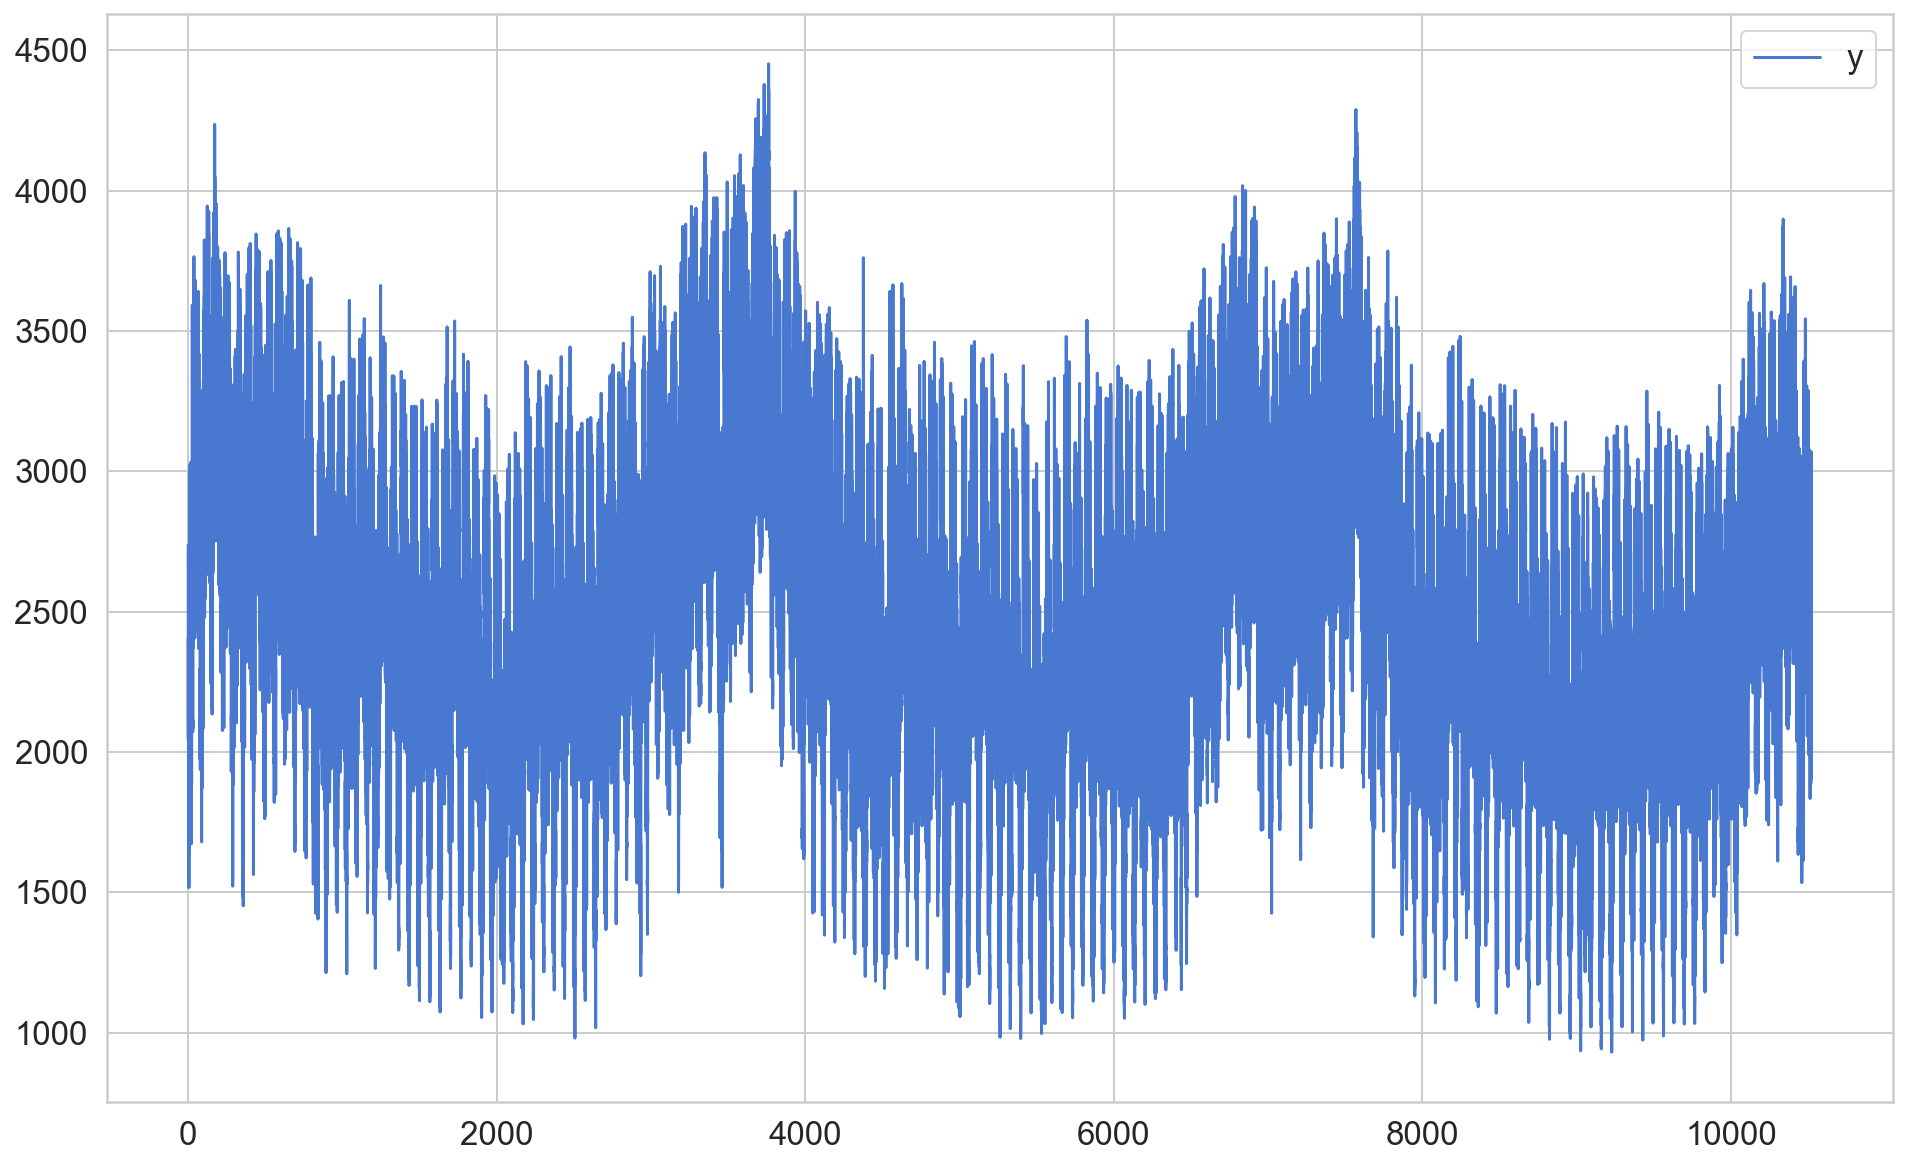

In [4]:
# df = pd.DataFrame(dict(y=sin), index=time, columns=['y'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
# print(len(train), len(test))
df.head()
df.plot()

## Data preprocessing

In [5]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 90

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.y, time_steps)
X_test, y_test = create_dataset(test, test.y, time_steps)

print(X_train.shape, y_train.shape)

(84082, 90, 1) (84082,)


## Modeling

In [6]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

## Training

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/5
4730/4730 [==============================] - 159s 33ms/step - loss: 6602510.3888 - val_loss: 5136591.0000
Epoch 2/5
4730/4730 [==============================] - 152s 32ms/step - loss: 5852235.1338 - val_loss: 4486425.0000
Epoch 3/5
4730/4730 [==============================] - 168s 35ms/step - loss: 5158307.0011 - val_loss: 3875361.7500
Epoch 4/5
4730/4730 [==============================] - 163s 34ms/step - loss: 4495938.8479 - val_loss: 3291829.7500
Epoch 5/5
4730/4730 [==============================] - 164s 35ms/step - loss: 3866178.5952 - val_loss: 2763840.5000


In [8]:
y_pred = model.predict(X_test)

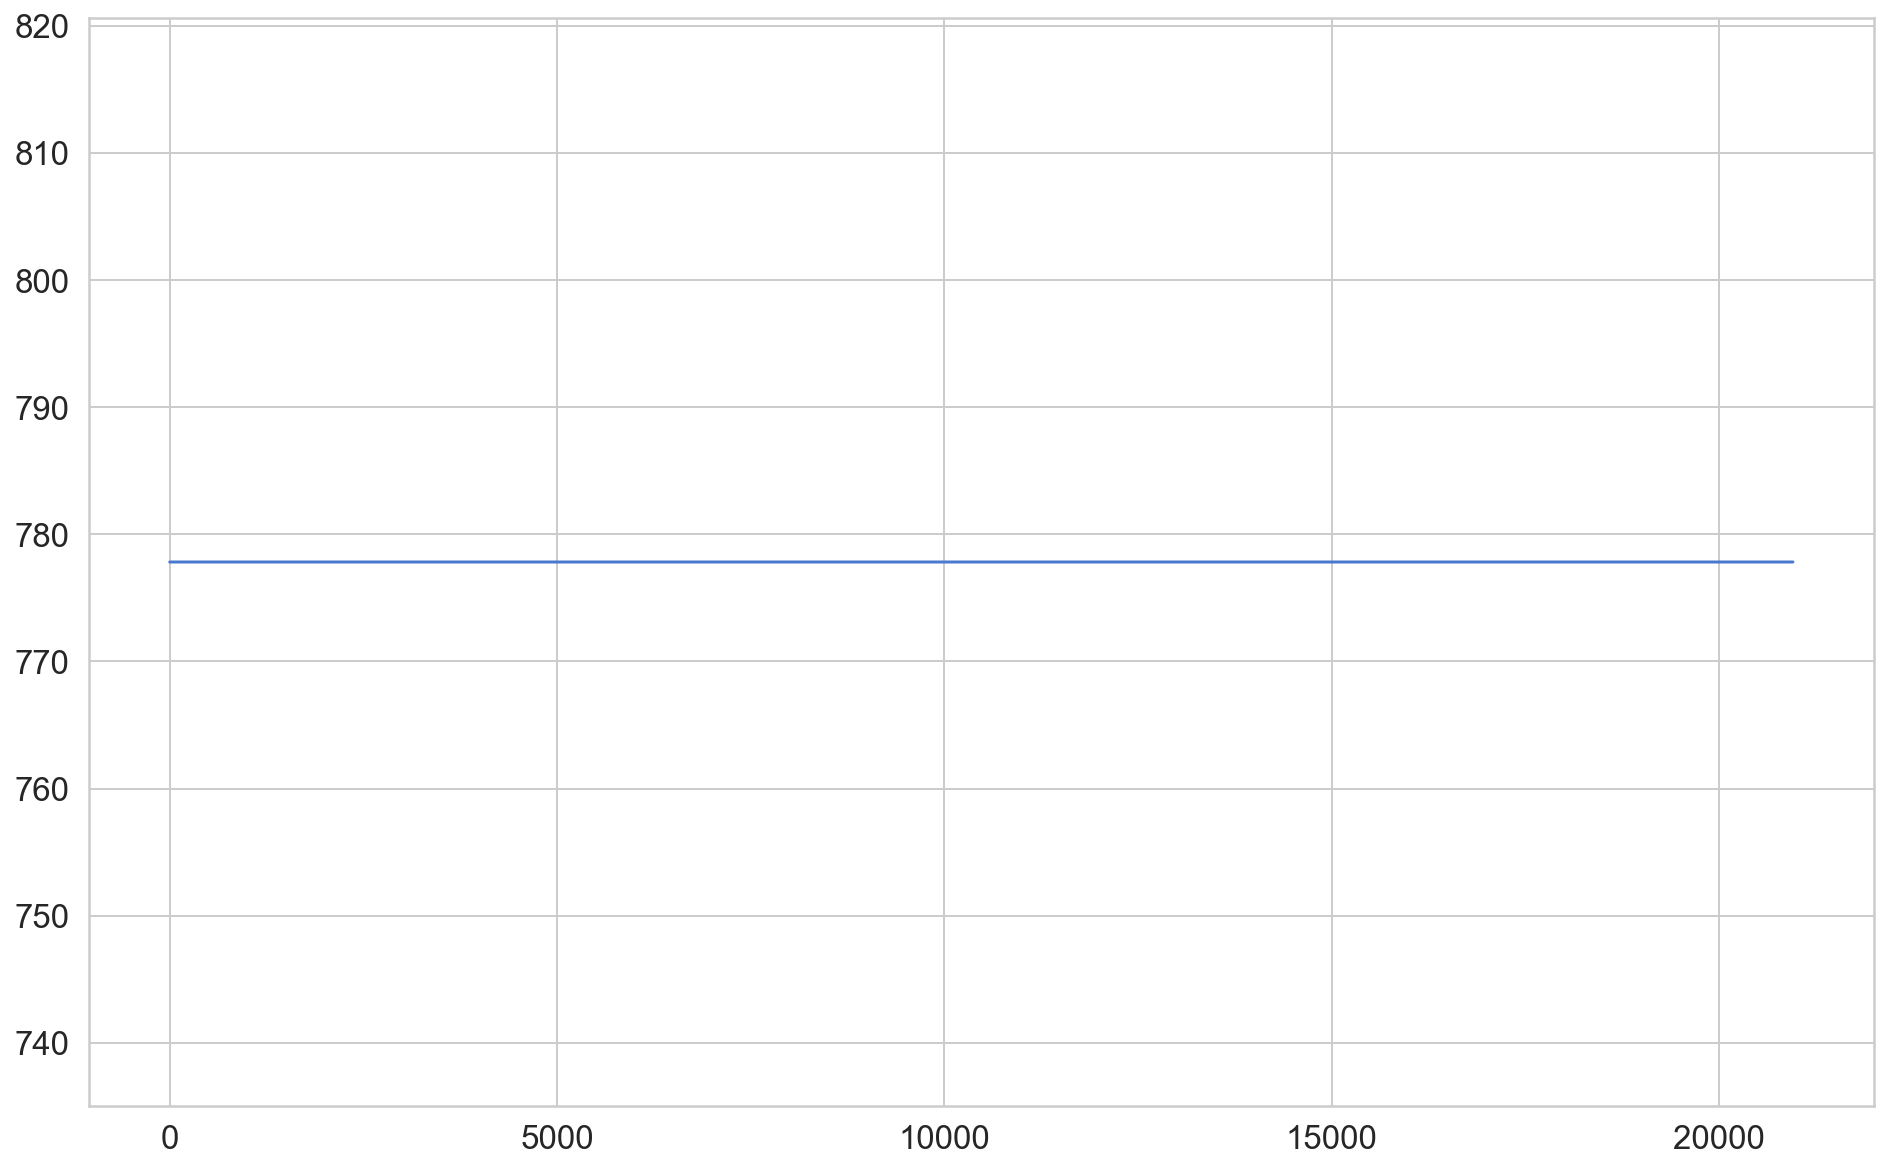

In [9]:
plt.plot(y_pred)